In [1]:
import numpy as np

In [2]:
import cv2 as cv

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import math

In [5]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing, 'gray')

In [6]:
def showImages(image1, image2):
    f = plt.figure(figsize = (10, 10))
    f.add_subplot(1, 1, 1)
    plt.imshow(image1, 'gray')
    f.add_subplot(1, 1, 1)
    plt.imshow(image2, 'gray')
    plt.show(block=True)

In [7]:
img = cv.imread("imageA.png", 0)

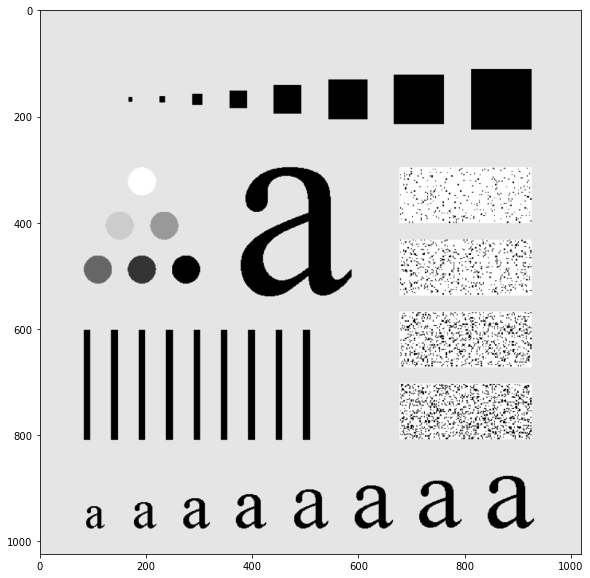

In [8]:
showImage(img)

In [9]:
imageShape = img.shape
print(imageShape)

(1024, 1019)


In [10]:
print(img)

[[229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 ...
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]]


In [13]:
def MultiplyMinus1(imageForProcessing):
    result = np.zeros(imageShape)
    for x in range(imageShape[0]):
        for y in range(imageShape[1]):
            result[x, y] = imageForProcessing[x, y] * (-1)**(x + y) 
    return result

In [14]:
#Умножаем пиксели изображения на (-1)**(x + y)
shiftedImage = MultiplyMinus1(img)

In [15]:
#Прямое преобразование Фурье
f = np.fft.fft2(shiftedImage)

In [16]:
magnitude_spectrum = np.log(np.abs(f))

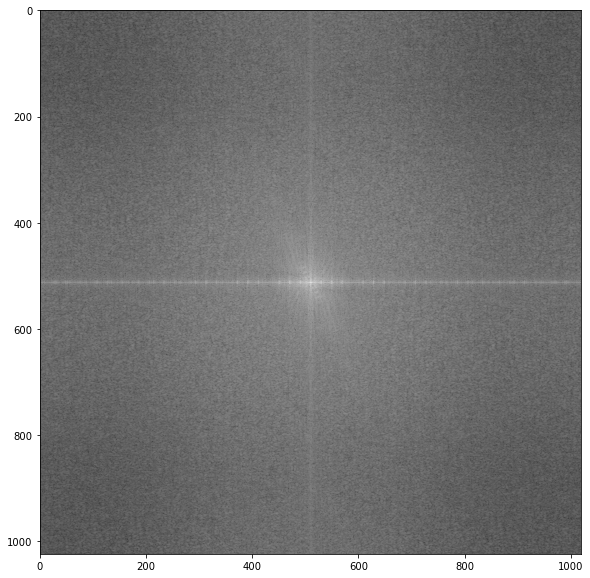

In [17]:
showImage(magnitude_spectrum)

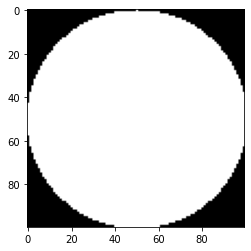

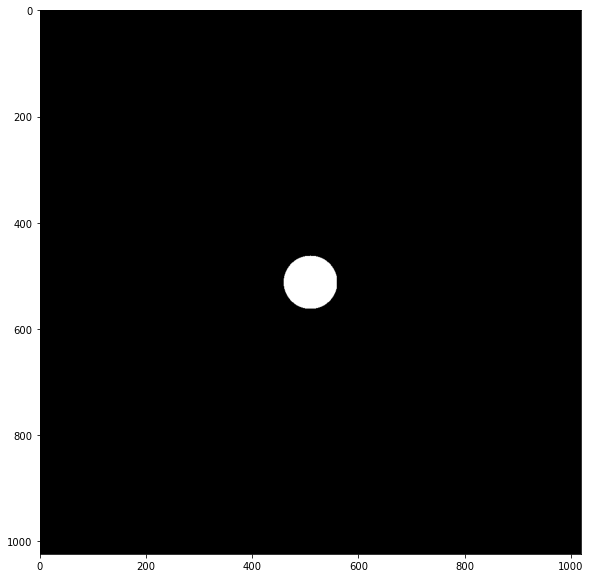

In [18]:
#Идеальный фильтр низких частот
size = 100
circle1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (size, size))
plt.imshow(circle1, 'gray')
startX = int(imageShape[0] / 2 - size / 2)
startY = int(imageShape[1] / 2 - size / 2)
iflf = np.zeros(imageShape)
for u in range(size):
    for v in range(size):
        iflf[startX + u, startY + v] = iflf[startX + u, startY + v] + circle1[u, v]
showImage(iflf)

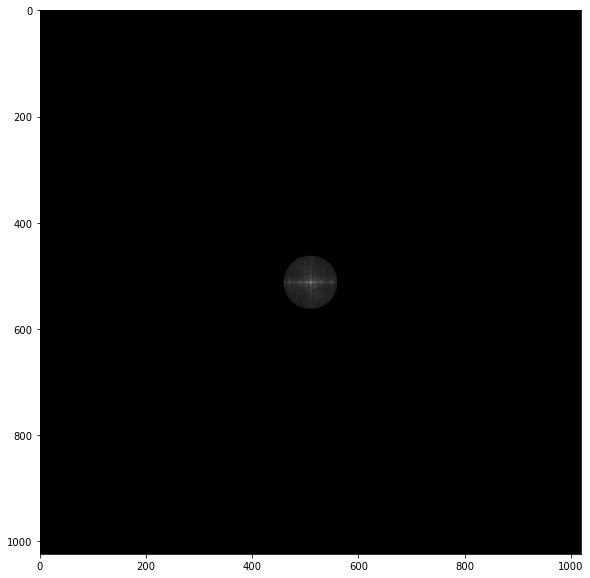

In [19]:
f_iflf = f * iflf
spectrum_iflf = np.power(np.abs(f_iflf), 0.3)
showImage(spectrum_iflf)

In [20]:
print(spectrum_iflf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


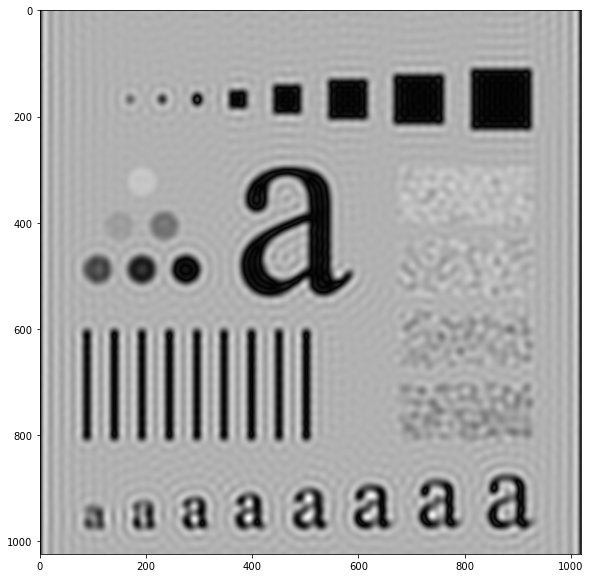

In [21]:
#Обратное преобразование Фурье
image_iflf = np.abs(np.fft.ifft2(f_iflf))
showImage(image_iflf)

In [22]:
ifhf = np.ones(imageShape) - iflf
print(ifhf)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


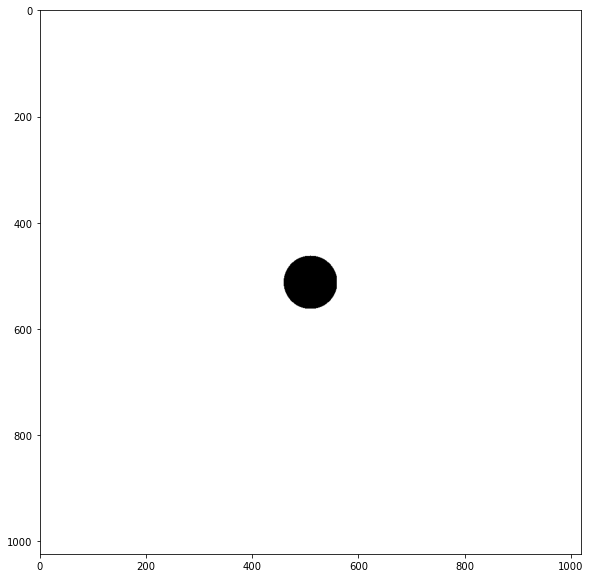

In [23]:
showImage(ifhf)

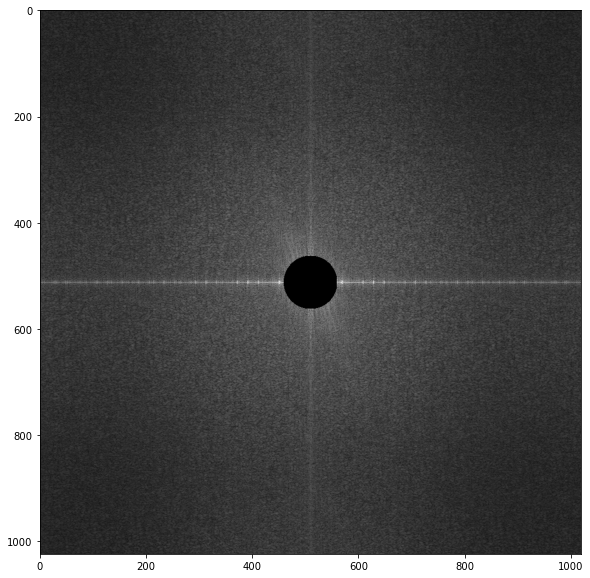

In [24]:
f_ifhf = f * ifhf
spectrum_ifhf = np.power(np.abs(f_ifhf), 0.3)
showImage(spectrum_ifhf)

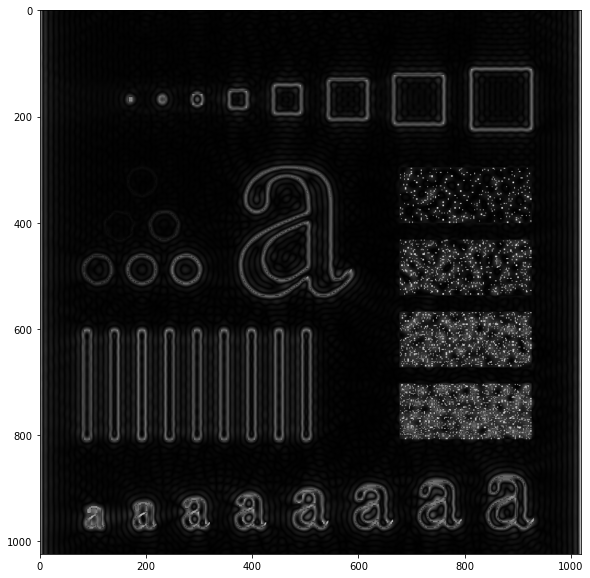

In [25]:
#Обратное преобразование Фурье после применения идеального высокочастотного фильтра 
image_ifhf = np.abs(np.fft.ifft2(f_ifhf))
showImage(image_ifhf)

In [26]:
D0 = 30
n = 2

In [27]:
#Фильтр низких частот Баттерворта
d = lambda u, v : math.sqrt((u - imageShape[0] / 2) ** 2 + (v - imageShape[1] / 2) ** 2)

In [28]:
h = lambda df : 1 / (1 + (df / D0) ** (2 * n))

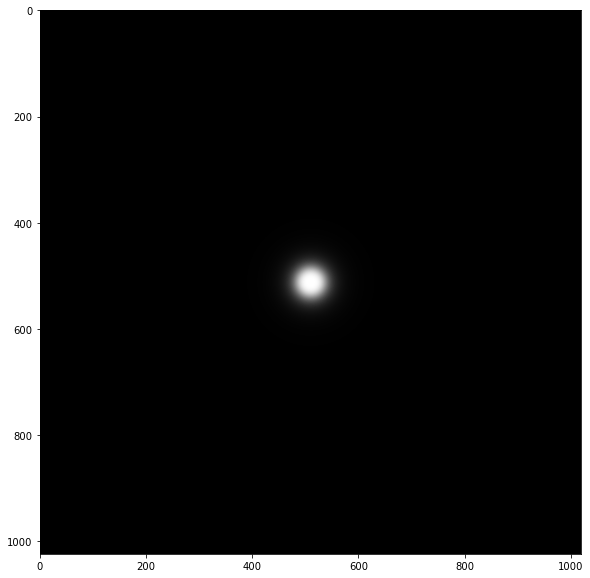

In [29]:
bflf = np.zeros(imageShape)
for iu in range(imageShape[0]):
    for jv in range(imageShape[1]):
        bflf[iu, jv] = h(d(iu, jv))
showImage(bflf)

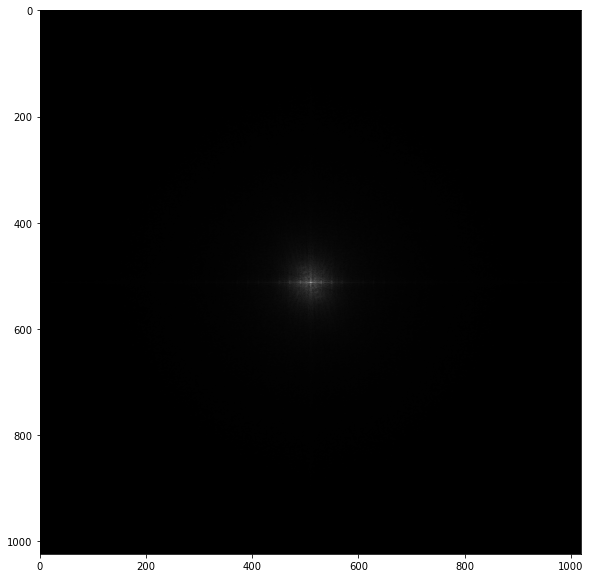

In [30]:
#Спектр после умножения на фильтр Баттерворта низких частот
f_bflf = f * bflf
spectrum_lf_bflf = np.power(np.abs(f_bflf), 0.3)
showImage(spectrum_lf_bflf)

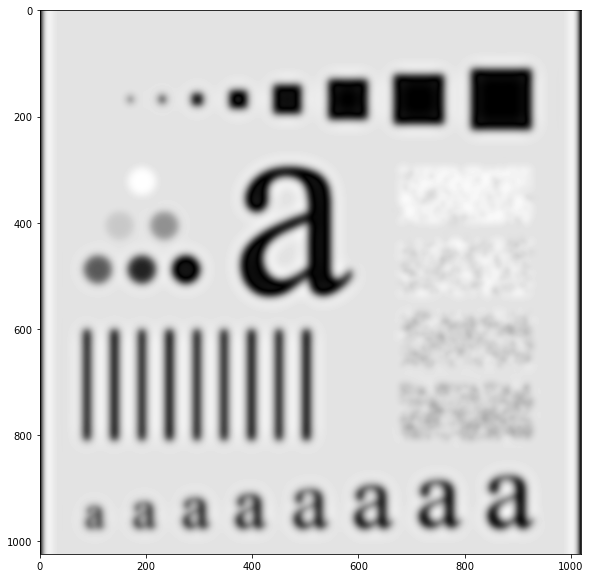

In [31]:
#Обратное преобразование Фурье после применения низкочастотного фильтра Батерворта
image_bflf = np.abs(np.fft.ifft2(f_bflf))
showImage(image_bflf)

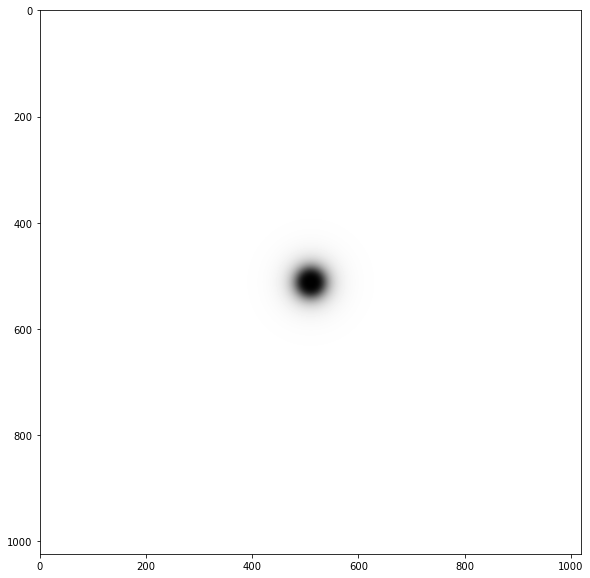

In [32]:
#Фильтр высоких частот Баттерворта
hhb = lambda df : 1 / (1 + (D0 /df ) ** (2 * n))
bfhf = np.zeros(imageShape)
for iu in range(imageShape[0]):
    for jv in range(imageShape[1]):
        bfhf[iu, jv] = hhb(d(iu, jv))
showImage(bfhf)

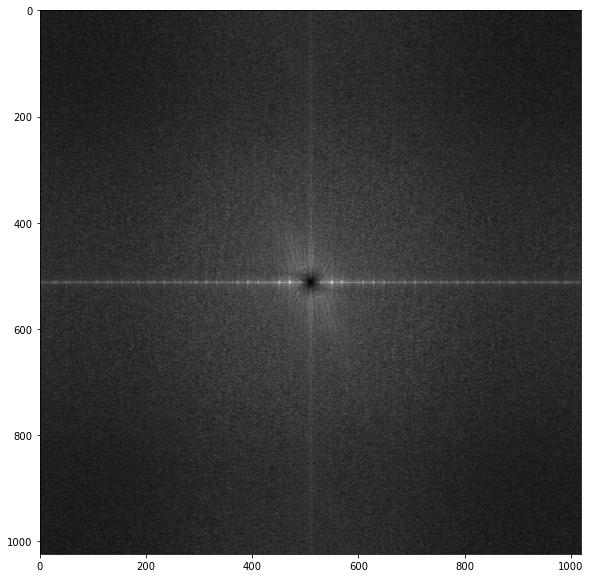

In [33]:
#Спектр после умножения на фильтр Баттерворта высоких частот
f_bfhf = f * bfhf
spectrum_bfhf = np.power(np.abs(f_bfhf), 0.3)
showImage(spectrum_bfhf)

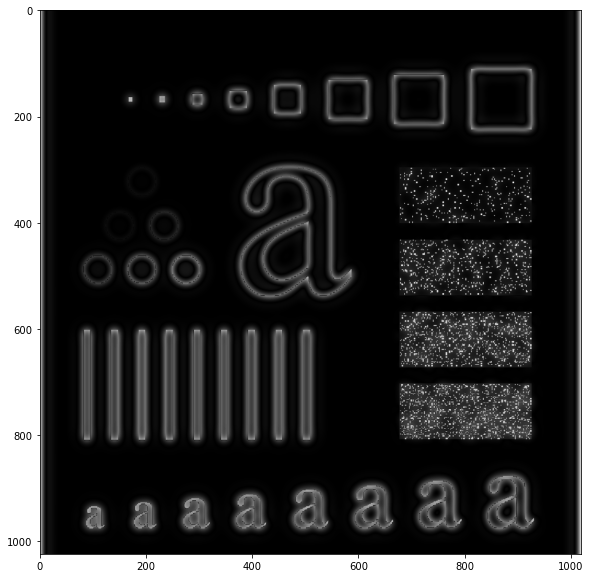

In [34]:
#Обратное преобразование Фурье после применения высокочастотного фильтра Батерворта
image_bfhf = np.abs(np.fft.ifft2(f_bfhf))
showImage(image_bfhf)

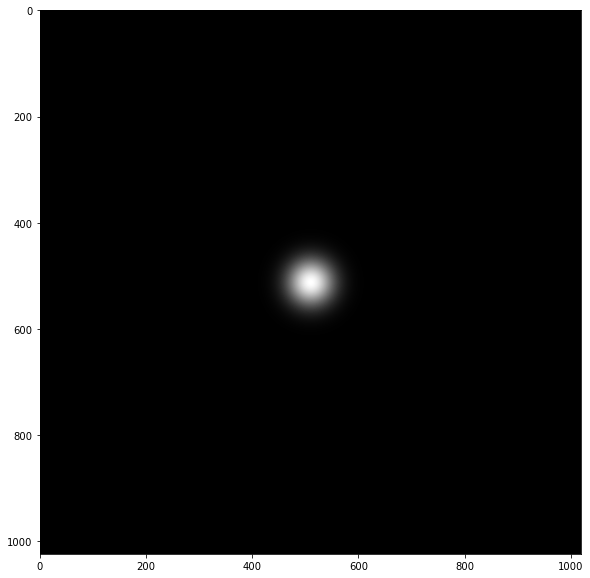

In [63]:
#Фильтр Гаусса низких частот
hlg = lambda df : math.exp((-1) * (df ** 2) / (2 * D0 ** 2))
g = np.zeros(imageShape)
for iu in range(imageShape[0]):
    for jv in range(imageShape[1]):        
        g[iu, jv] = hlg(d(iu, jv))
showImage(g)

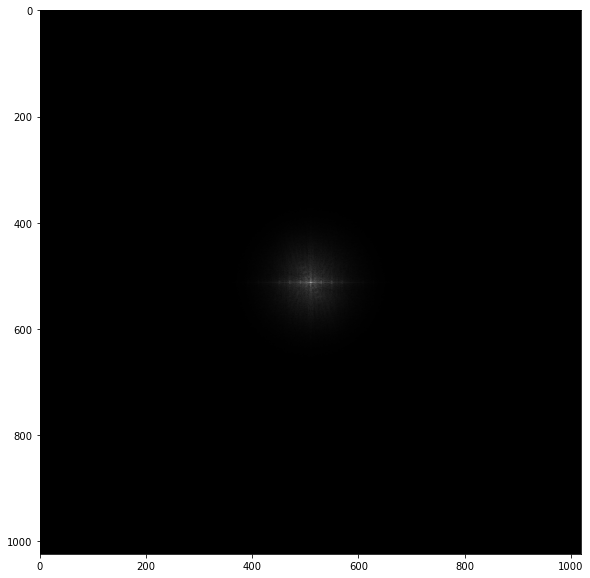

In [64]:
#Спектр Фурье после умножения на фильтр Гаусса низких частот
gl = f * g
spectrum_gl = np.power(np.abs(gl), 0.3)
showImage(spectrum_gl)

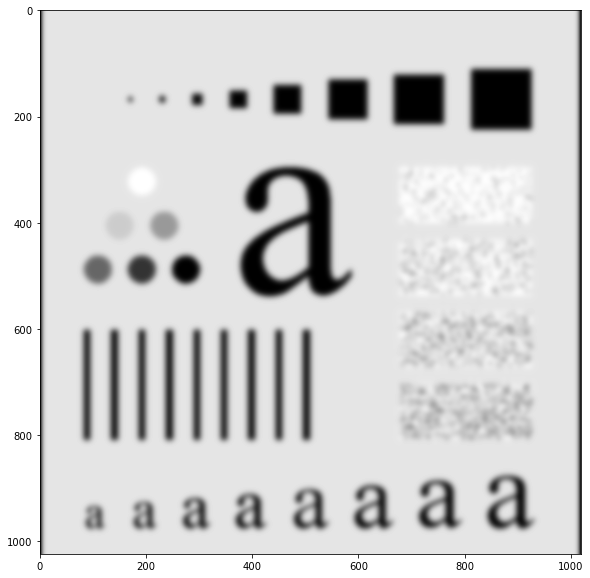

In [65]:
#Обратное преобразование Фурье после применения фильтра Гаусса низких частот
image_gl = np.abs(np.fft.ifft2(gl))
showImage(image_gl)

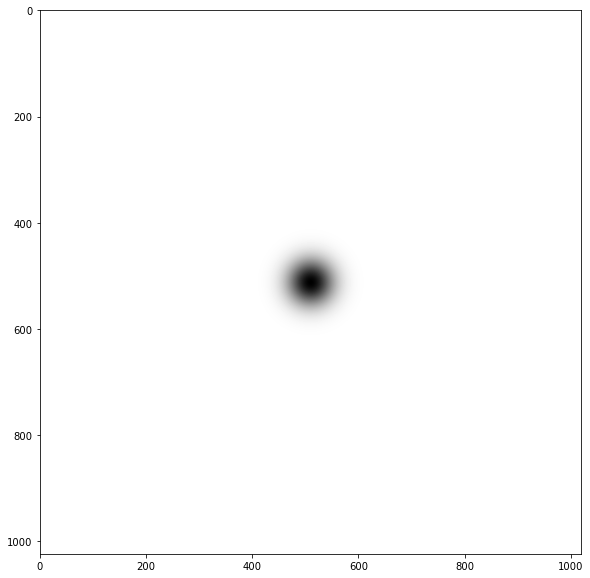

In [66]:
#Фильтр Гаусса высоких частот
hhg = lambda df : 1 - math.exp((-1) * (df ** 2) / (2 * D0 ** 2))
gh = np.zeros(imageShape)
for iu in range(imageShape[0]):
    for jv in range(imageShape[1]):        
        gh[iu, jv] = hhg(d(iu, jv))
showImage(gh)

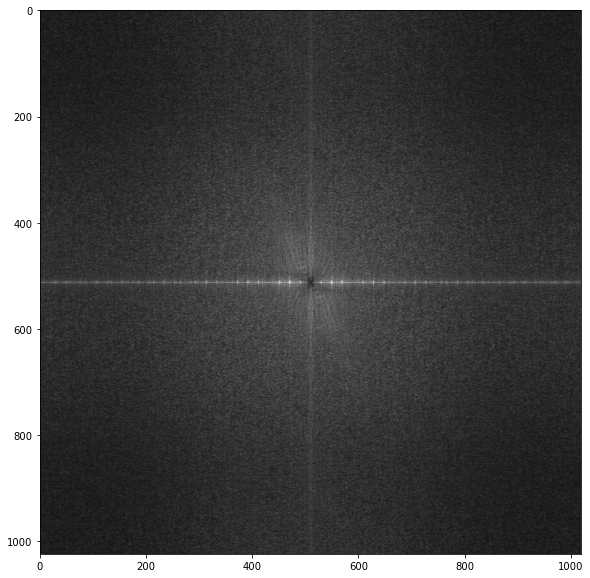

In [67]:
#Спектр Фурье после применения фильтра Гаусса высоких частот
fgh = f * gh
spectrum_gh = np.power(np.abs(fgh), 0.3)
showImage(spectrum_gh)

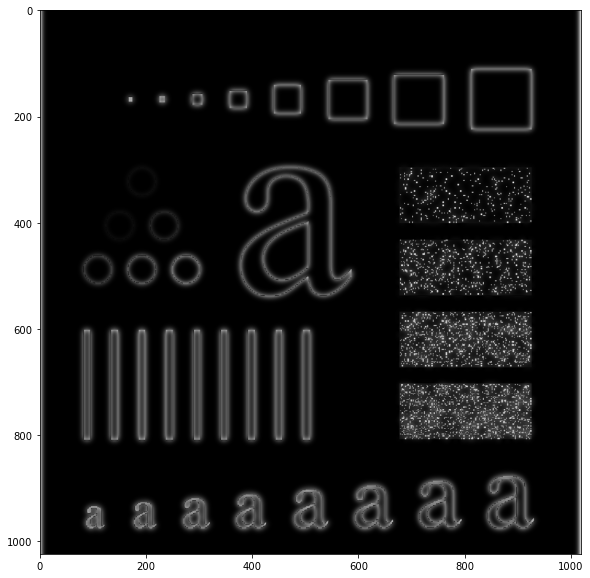

In [68]:
#Обратное преобразование Фурье после применения фильтра Гаусса высоких частот
image_gh = np.abs(np.fft.ifft2(fgh))
showImage(image_gh)